In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df=pd.read_csv("tvmarketing.csv")

In [3]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [4]:
df.shape

(200, 2)

In [5]:
print("the no.of rows:",df.shape[0])

the no.of rows: 200


In [6]:
print("the no.of cols:",df.shape[1])

the no.of cols: 2


In [7]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [10]:
x=df['TV']
y=df['Sales']

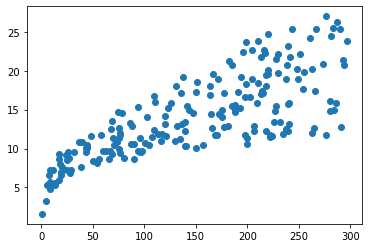

In [11]:
plt.scatter(x,y)

<Axes: xlabel='TV', ylabel='Sales'>

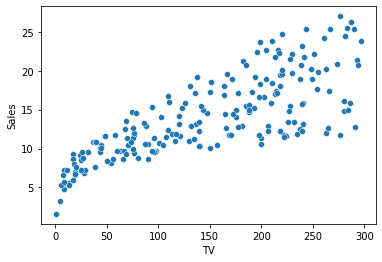

In [12]:
sns.scatterplot(x=x,y=y)

In [13]:
feature_variable=x
response_variable=y

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [122]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((140,), (140,), (60,), (60,))

In [123]:
x_bar=np.mean(x_train)
y_bar=np.mean(y_train)

numerator=np.sum((x_train-x_bar)*(y_train-y_bar))
denominator=np.sum((x_train-x_bar)**2)

slope_beta=numerator/denominator

intercept_alpha=y_bar-slope_beta*x_bar

print("the slope:",slope_beta)
print("the intercept:",intercept_alpha)

the slope: 0.05047687282905221
the intercept: 6.8208673079727555


In [124]:
y_pred=intercept_alpha+slope_beta*x_test

In [125]:
y_pred

47     18.930269
128    17.940922
188    21.257253
94     12.242083
152    16.795097
153    15.467556
93     19.485515
59     17.456344
33     20.227525
23     18.344737
37     10.591490
25     20.091237
88     11.277975
95     15.063741
107    11.383977
78      7.093442
165    18.657694
74     17.592632
85     16.572999
140    10.525870
17     21.025059
182     9.657668
46     11.348643
173    15.321173
181    17.850064
178    20.787818
158     7.411447
197    15.755274
69     17.764253
143    12.100748
122    18.127687
103    16.305472
96     16.795097
50     16.906146
89     12.363228
102    20.964487
18     10.313867
170     9.344711
147    19.096843
144    11.676742
145    13.902773
137    20.636387
121     7.769833
83     10.273485
190     8.814704
135     9.258900
199    18.536549
154    16.300424
126     7.214587
157    14.382303
163    15.073836
176    19.359323
193    15.240410
75      7.673926
131    20.207334
155     7.027822
183    21.338016
54     20.081142
125    11.2224

In [126]:
y_pred.shape

(60,)

In [134]:
x_train_reshaped = x_train.values.reshape(-1, 1)
x_test_reshaped = x_test.values.reshape(-1, 1)
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(140, 1)
(60, 1)


In [137]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train_reshaped,y_train)

LinearRegression()

In [138]:
print("Intercept",lr.intercept_)
print("coefficient:",lr.coef_[0])

Intercept 6.820867307972754
coefficient: 0.05047687282905222


In [141]:
y_pred=lr.predict(x_test_reshaped)
y_pred

array([18.9302691 , 17.94092239, 21.25725294, 12.24208345, 16.79509738,
       15.46755562, 19.4855147 , 17.45634441, 20.22752473, 18.34473737,
       10.59148971, 20.09123717, 11.27797518, 15.06374064, 11.38397661,
        7.09344242, 18.65769399, 17.59263197, 16.57299914, 10.52586977,
       21.02505932,  9.65766756, 11.3486428 , 15.32117269, 17.85006402,
       20.78781802,  7.41144672, 15.7552738 , 17.76425334, 12.10074821,
       18.12768682, 16.30547171, 16.79509738, 16.9061465 , 12.36322794,
       20.96448707, 10.31386691,  9.34471095, 19.09684278, 11.67674247,
       13.90277257, 20.6363874 ,  7.76983252, 10.27348541,  8.81470378,
        9.25890027, 18.53654949, 16.30042403,  7.21458692, 14.38230286,
       15.07383602, 19.35932252, 15.2404097 ,  7.67392646, 20.20733398,
        7.02782249, 21.33801593, 20.0811418 , 11.22245062, 17.69358572])

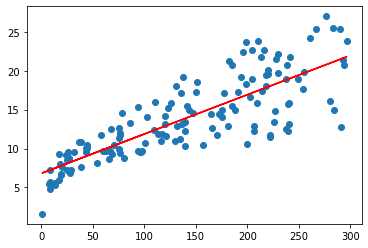

In [146]:
plt.scatter(x_train_reshaped,y_train)
plt.plot(x_train_reshaped,lr.predict(x_train_reshaped),color="red")

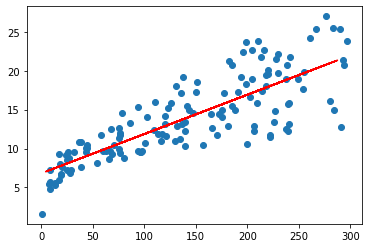

In [148]:
plt.scatter(x_train_reshaped,y_train)
#y_pred=lr.predict(x_test_reshaped)
plt.plot(x_test_reshaped,y_pred,color="red")

In [154]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score=r2_score(y_test,y_pred)#Use X_train + y_train to train the model.

#Use X_test to make predictions.

#Use y_test to evaluate the predictions.
print("R2 score:",r2_score)

mean_square_error=mean_squared_error(y_test,y_pred)
print("mean square error:",mean_square_error)

R2 score: 0.4704055795989771
mean square error: 14.201598093091379


In [163]:
num=np.sum((y_test-y_pred)**2)
den=np.sum((y_test-y_bar)**2)

r_square=1-(num/den)
print("the R2 square:",r_square)

n=len(y_test)
k=1

num1=(1-r_square)*(n-1)
den1=n-k-1

adj_r_square=num1/den1

print("the adjustedd r2 value:",adj_r_square)

the R2 square: 0.472732994934546
the adjustedd r2 value: 0.536357815497617
